In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.neural_net import TwoLayerNet
from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

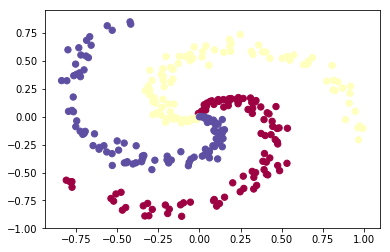

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

If the batch size set to be high, e.g., 100 all data, the network never learns (or remember) all train data. That's the power of intentional increasing noise in the mini-batch SGD training.

In [3]:
hidden_size=100
net=TwoLayerNet(input_size=D, hidden_size=hidden_size, output_size=K)
stats=net.train(X,y ,X[:2], y[:2], num_iters=2000, learning_rate=1, batch_size=10,reg=1e-9, verbose=True)
print('train acc %.4f'%stats['train_acc_history'][-1])

iteration 0 / 2000: loss 1.097760
iteration 100 / 2000: loss 0.726843
iteration 200 / 2000: loss 0.655905
iteration 300 / 2000: loss 0.191406
iteration 400 / 2000: loss 0.316565
iteration 500 / 2000: loss 0.466005
iteration 600 / 2000: loss 0.137509
iteration 700 / 2000: loss 0.365473
iteration 800 / 2000: loss 0.381753
iteration 900 / 2000: loss 0.272412
iteration 1000 / 2000: loss 0.236363
iteration 1100 / 2000: loss 0.282477
iteration 1200 / 2000: loss 0.014234
iteration 1300 / 2000: loss 0.063678
iteration 1400 / 2000: loss 0.237592
iteration 1500 / 2000: loss 0.118010
iteration 1600 / 2000: loss 0.227818
iteration 1700 / 2000: loss 0.049812
iteration 1800 / 2000: loss 0.147171
iteration 1900 / 2000: loss 0.024718
train acc 1.0000


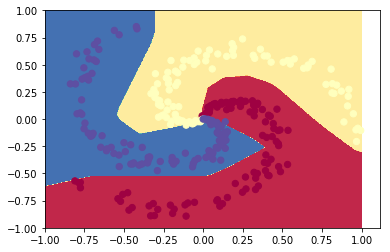

In [4]:
xi=np.linspace(-1,1,5*N)
xx,xy=np.meshgrid(xi,xi)
X_grid=np.c_[[xx.flatten(),xy.flatten()]].T
y_grid=net.predict(X_grid)
y_grid=y_grid.reshape(*xx.shape)
plt.contourf(xi,xi,y_grid, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()